In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE

In [2]:
fault_test = pd.read_csv("../data/Final_test_data.csv")
fault_test

C:\Users\nitin\AppData\Local\Temp\ipykernel_4316\1480078895.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  fault_test = pd.read_csv("../data/Final_test_data.csv")


,RecordID,EquipmentID,EventTimeStamp,spn,fmi,active,AcceleratorPedal,BarometricPressure,CruiseControlSetSpeed,EngineCoolantTemperature,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,is_derate_code,target,code_spn_fmi
0,1,1439,2015-02-21 10:47:13,111,17,True,0.000000,14.210000,66.486720,100.400000,...,36.52609,NaN,78.8,0.000000,3276.750000,67.267382,0.000000,0,0,111_17
1,2,1439,2015-02-21 11:34:34,629,12,True,39.777778,14.479861,66.486720,169.900000,...,36.52609,NaN,108.4,32.002901,3276.750000,67.267382,6.704118,0,0,629_12
2,4,1369,2015-02-21 11:35:33,1807,2,True,32.400000,14.229773,65.526416,189.418182,...,36.52609,NaN,95.0,32.877949,3276.750000,67.267382,10.387273,0,0,1807_2
3,6,1417,2015-02-21 11:40:22,111,17,True,48.000000,14.427500,64.622600,181.400000,...,36.52609,NaN,111.2,13.602200,3276.750000,67.267382,6.670000,0,0,111_17
4,8,1429,2015-02-21 11:40:22,111,17,True,66.666667,14.451667,66.486720,187.400000,...,36.52609,NaN,87.8,35.499067,3276.750000,67.267382,18.366667,0,0,111_17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341484,1232458,2174,2000-05-30 09:00:59,111,4,True,0.000000,14.500000,0.000000,118.400000,...,36.52609,NaN,84.2,0.000000,3224.106067,100.000000,0.000000,0,0,111_4
341485,1236126,2206,2000-06-08 12:06:28,37,1,True,0.000000,14.355000,0.000000,170.600000,...,36.52609,NaN,122.0,0.000000,3224.106067,100.000000,0.000000,0,0,37_1
341486,1237840,2175,2011-01-01 00:03:22,5246,16,True,0.000000,14.427500,0.000000,120.200000,...,36.52609,NaN,93.2,0.000000,3224.106067,100.000000,0.000000,0,0,5246_16
341487,1237841,2175,2011-01-01 00:03:23,5246,0,True,0.000000,14.427500,0.000000,120.200000,...,36.52609,NaN,93.2,0.000000,3224.106067,100.000000,0.000000,0,0,5246_0


In [3]:
fault_test = fault_test[fault_test['spn'] != '5246']
fault_test = fault_test.drop(columns=['code_spn_fmi'])

In [4]:
columns_to_use2 = ['RecordID','EquipmentID','EventTimeStamp','spn','fmi','active','AcceleratorPedal','BarometricPressure','CruiseControlSetSpeed','EngineCoolantTemperature','EngineLoad','EngineOilPressure','EngineOilTemperature','EngineRpm','EngineTimeLtd','FuelLevel','FuelLtd','FuelTemperature','IgnStatus','IntakeManifoldTemperature','Speed','SwitchedBatteryVoltage','Throttle','TurboBoostPressure','is_derate_code', 'target']

try2 = fault_test[columns_to_use2]

In [5]:
columns = ['AcceleratorPedal', 'BarometricPressure', 'CruiseControlSetSpeed',
       'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel',
       'FuelLtd', 'FuelTemperature', 'IgnStatus', 'IntakeManifoldTemperature',
       'Speed', 'SwitchedBatteryVoltage', 'Throttle', 'TurboBoostPressure']

for col in columns:

    try2[col] = pd.to_numeric(try2[col], errors='coerce')


    try2[col] = try2.groupby('EquipmentID')[col].transform(
        lambda x: x.fillna(x.mean())
    )


    try2[col] = try2[col].fillna(try2[col].mean())


In [6]:
variables2 = ['RecordID','EquipmentID','EventTimeStamp','spn','fmi','active','AcceleratorPedal','BarometricPressure','CruiseControlSetSpeed','EngineCoolantTemperature','EngineLoad','EngineOilPressure','EngineOilTemperature','EngineRpm','EngineTimeLtd','FuelLevel','FuelLtd','FuelTemperature', 'IntakeManifoldTemperature','Speed','SwitchedBatteryVoltage','Throttle','TurboBoostPressure','is_derate_code']

X = try2[variables2]
y = try2['target']

X.loc[:, 'EquipmentID'] = X['EquipmentID'].astype(str)
cat_variables = ['EquipmentID', 'active']
num_variables = ['RecordID','spn', 'fmi', 'is_derate_code', 'AcceleratorPedal', 'BarometricPressure', 'CruiseControlSetSpeed', 'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel', 'FuelLtd', 'FuelTemperature', 'IntakeManifoldTemperature', 'Speed', 'SwitchedBatteryVoltage', 'Throttle', 'TurboBoostPressure']

transformations = ColumnTransformer(
    transformers = [
        ('scaler', StandardScaler(), num_variables), 
        ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_variables), 
        ('drop_id', 'drop', ['RecordID','EventTimeStamp'])
    ], 
    remainder = 'passthrough'
)

In [7]:
X

,RecordID,EquipmentID,EventTimeStamp,spn,fmi,active,AcceleratorPedal,BarometricPressure,CruiseControlSetSpeed,EngineCoolantTemperature,...,EngineTimeLtd,FuelLevel,FuelLtd,FuelTemperature,IntakeManifoldTemperature,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,is_derate_code
0,1,1439,2015-02-21 10:47:13,111,17,True,0.000000,14.210000,66.486720,100.400000,...,1632.200000,43.200000,12300.907429,36.52609,78.8,0.000000,3276.750000,67.267382,0.000000,0
1,2,1439,2015-02-21 11:34:34,629,12,True,39.777778,14.479861,66.486720,169.900000,...,1966.911111,74.235294,14454.357278,36.52609,108.4,32.002901,3276.750000,67.267382,6.704118,0
2,4,1369,2015-02-21 11:35:33,1807,2,True,32.400000,14.229773,65.526416,189.418182,...,9623.505000,63.710614,74900.833990,36.52609,95.0,32.877949,3276.750000,67.267382,10.387273,0
3,6,1417,2015-02-21 11:40:22,111,17,True,48.000000,14.427500,64.622600,181.400000,...,9480.000000,44.000000,70349.809964,36.52609,111.2,13.602200,3276.750000,67.267382,6.670000,0
4,8,1429,2015-02-21 11:40:22,111,17,True,66.666667,14.451667,66.486720,187.400000,...,8825.066667,63.710614,67418.512846,36.52609,87.8,35.499067,3276.750000,67.267382,18.366667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341484,1232458,2174,2000-05-30 09:00:59,111,4,True,0.000000,14.500000,0.000000,118.400000,...,4367.100000,63.200000,28540.884326,36.52609,84.2,0.000000,3224.106067,100.000000,0.000000,0
341485,1236126,2206,2000-06-08 12:06:28,37,1,True,0.000000,14.355000,0.000000,170.600000,...,4425.300000,47.600000,17626.880170,36.52609,122.0,0.000000,3224.106067,100.000000,0.000000,0
341486,1237840,2175,2011-01-01 00:03:22,5246,16,True,0.000000,14.427500,0.000000,120.200000,...,4829.050000,93.600000,30812.896059,36.52609,93.2,0.000000,3224.106067,100.000000,0.000000,0
341487,1237841,2175,2011-01-01 00:03:23,5246,0,True,0.000000,14.427500,0.000000,120.200000,...,4829.050000,93.600000,30812.896059,36.52609,93.2,0.000000,3224.106067,100.000000,0.000000,0


In [8]:
from imblearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321,test_size=0.3,stratify=y)
pipe = Pipeline(steps = [
    ('transformations', transformations), 
    ('smote', SMOTE(random_state=321)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('transformations',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['RecordID', 'spn', 'fmi',
                                                   'is_derate_code',
                                                   'AcceleratorPedal',
                                                   'BarometricPressure',
                                                   'CruiseControlSetSpeed',
                                                   'EngineCoolantTemperature',
                                                   'EngineLoad',
                                                   'EngineOilPressure',
                                                   'EngineOilTemperature',
                                                   'EngineRpm', 'EngineTimeLtd',
                                                   'FuelLevel', 'FuelLtd',
                                                   'FuelTemperature',
                                                   'IntakeManifoldTemperature',
                                                   'Speed',
                                                   'SwitchedBatteryVoltage',
                                                   'Throttle',
                                                   'TurboBoostPressure']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['EquipmentID', 'active']),
                                                 ('drop_id', 'drop',
                                                  ['RecordID',
                                                   'EventTimeStamp'])])),
                ('smote', SMOTE(random_state=321)),
                ('rf', RandomForestClassifier(random_state=42))])

In [9]:
y_pred_lr = pipe.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

0.9991019746795904
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    102275
           1       0.86      0.56      0.68       172

    accuracy                           1.00    102447
   macro avg       0.93      0.78      0.84    102447
weighted avg       1.00      1.00      1.00    102447



In [10]:
confusion_matrix(y_test, y_pred_lr)

array([[102259,     16],
       [    76,     96]], dtype=int64)

In [11]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Predict probabilities again
y_proba = pipe.predict_proba(X_test)[:, 1]

# Calculate precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Calculate F1 for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

# Find the threshold that gives maximum F1
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold for Maximum F1-Score: {best_threshold:.4f}")


Best Threshold for Maximum F1-Score: 0.4200


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#Apply the best threshold
y_pred_best = (y_proba >= best_threshold).astype(int)

print("\nConfusion Matrix (Best Threshold):")
cm=confusion_matrix(y_test, y_pred_best)

cm_df = pd.DataFrame(
    cm,
    index=['Actual Negative (0)', 'Actual Positive (1)'],
    columns=['Predicted Negative (0)', 'Predicted Positive (1)']
)

print("\nConfusion Matrix (User-Friendly):")
print(cm_df)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")



Confusion Matrix (Best Threshold):

Confusion Matrix (User-Friendly):
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                  102253                      22
Actual Positive (1)                      65                     107

Accuracy: 0.9992
Precision: 0.8295
Recall: 0.6221
F1 Score: 0.7110


In [13]:
cm_df

,Predicted Negative (0),Predicted Positive (1)
Actual Negative (0),102253,22
Actual Positive (1),65,107


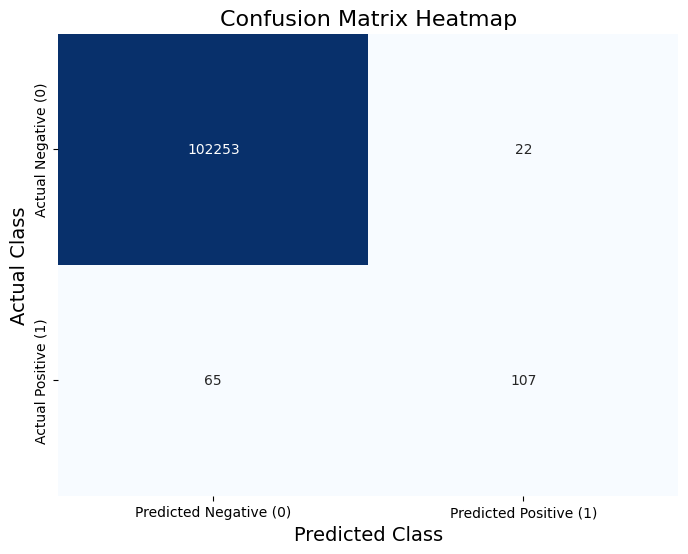

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap', fontsize=16)
plt.ylabel('Actual Class', fontsize=14)
plt.xlabel('Predicted Class', fontsize=14)
plt.show()

In [15]:
# Lower threshold a bit more
new_threshold = 0.28

y_pred_lower_threshold = (y_proba >= new_threshold).astype(int)

# Re-evaluate

print("\nConfusion Matrix (Lowered Threshold):")
print(confusion_matrix(y_test, y_pred_lower_threshold))

print(f"\nPrecision: {precision_score(y_test, y_pred_lower_threshold):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lower_threshold):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lower_threshold):.4f}")



Confusion Matrix (Lowered Threshold):
[[102226     49]
 [    55    117]]

Precision: 0.7048
Recall: 0.6802
F1 Score: 0.6923


In [16]:
# New relaxed conditions
precision_min = 0.65
recall_min = 0.70

valid_thresholds = []

for i, t in enumerate(thresholds):
    if precisions[i] >= precision_min and recalls[i] >= recall_min:
        valid_thresholds.append((t, precisions[i], recalls[i]))

#Pick best among valid thresholds
if valid_thresholds:
    best_valid = max(valid_thresholds, key=lambda x: 2 * (x[1] * x[2]) / (x[1] + x[2] + 1e-8))
    best_threshold = best_valid[0]
    print(f"\n Found Relaxed Threshold: {best_threshold:.4f} with Precision={best_valid[1]:.4f} and Recall={best_valid[2]:.4f}")
else:
    print("\n Even relaxed conditions not met.")



 Found Relaxed Threshold: 0.2500 with Precision=0.6685 and Recall=0.7035


In [17]:
#  Apply the best relaxed threshold
final_threshold = 0.25

y_pred_final = (y_proba >= final_threshold).astype(int)

#  Evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("\nConfusion Matrix (Final Threshold 0.25):")
print(confusion_matrix(y_test, y_pred_final))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_final):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_final):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_final):.4f}")
print(classification_report(y_test, y_pred_final, digits=4))


Confusion Matrix (Final Threshold 0.25):
[[102215     60]
 [    51    121]]

Accuracy: 0.9989
Precision: 0.6685
Recall: 0.7035
F1 Score: 0.6856
              precision    recall  f1-score   support

           0     0.9995    0.9994    0.9995    102275
           1     0.6685    0.7035    0.6856       172

    accuracy                         0.9989    102447
   macro avg     0.8340    0.8515    0.8425    102447
weighted avg     0.9989    0.9989    0.9989    102447



In [18]:
import joblib
# Save trained pipeline
joblib.dump(pipe, 'bigG_model_randomForest.pkl')

# Save threshold separately
with open('best_threshold.txt', 'w') as f:
    f.write(str(final_threshold))

In [19]:
from xgboost import XGBClassifier

pipe = Pipeline(steps = [
    ('transformations', transformations), 
    ('smote', SMOTE(random_state=321)),
    ('xgb', XGBClassifier(n_estimators=300, random_state=42,n_jobs=-1,scale_pos_weight=100))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('transformations',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['RecordID', 'spn', 'fmi',
                                                   'is_derate_code',
                                                   'AcceleratorPedal',
                                                   'BarometricPressure',
                                                   'CruiseControlSetSpeed',
                                                   'EngineCoolantTemperature',
                                                   'EngineLoad',
                                                   'EngineOilPressure',
                                                   'EngineOilTemperature',
                                                   'EngineRpm', 'EngineTimeLtd',
                                                   'FuelLevel', 'Fue...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

In [20]:
y_pred_xgb = pipe.predict(X_test)
print(accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

0.998555350571515
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    102275
           1       0.56      0.70      0.62       172

    accuracy                           1.00    102447
   macro avg       0.78      0.85      0.81    102447
weighted avg       1.00      1.00      1.00    102447



In [21]:
confusion_matrix(y_test, y_pred_xgb)

array([[102179,     96],
       [    52,    120]], dtype=int64)